In [11]:
import numpy as np
from netCDF4 import Dataset
import sys
sys.path.append('/data/shared_data/scripts/ammss')
from Interpolator import Interpolator

### Load wrfout file

In [97]:
from wrf import getvar, ll_to_xy, ALL_TIMES, interplevel
wrf_path = '/data/shared_data/model/2024052012/wrfout_d03_2024-05-21_14:00:00'
wrfout = Dataset(wrf_path)

### Extract theta and z using getvar

In [99]:
theta = getvar(wrfout, 'theta')
z = getvar(wrfout, 'z', msl=False)

### Choose desired levels of altitude that we will interpolate our data to. Here we have used numpy to generate an array of integers, but we could also do this manually if we were intested in more specific levels e.g. `desiredlev=[400, 800, 1500]`.

In [109]:
desiredlev = np.arange(25, 2025, 25)
desiredlev

array([  25,   50,   75,  100,  125,  150,  175,  200,  225,  250,  275,
        300,  325,  350,  375,  400,  425,  450,  475,  500,  525,  550,
        575,  600,  625,  650,  675,  700,  725,  750,  775,  800,  825,
        850,  875,  900,  925,  950,  975, 1000, 1025, 1050, 1075, 1100,
       1125, 1150, 1175, 1200, 1225, 1250, 1275, 1300, 1325, 1350, 1375,
       1400, 1425, 1450, 1475, 1500, 1525, 1550, 1575, 1600, 1625, 1650,
       1675, 1700, 1725, 1750, 1775, 1800, 1825, 1850, 1875, 1900, 1925,
       1950, 1975, 2000])

### using the wrf-python `interplevel` function, interpolate both theta and z to our desired altitude levels - note: you can also interpolate to pressure levels! Just load 'pressure' using wrf-python and substitude it for z below, be aware that you will then need to change you desired levels accordingly!

In [102]:
theta_on_alt = interplevel(theta, z, desiredlev=desiredlev)

In [103]:
z_on_alt = interplevel(z, z, desiredlev=desiredlev)

In [107]:
z_on_alt

<xarray.DataArray 'height_agl_interp' (level: 198, south_north: 145,
                                       west_east: 320)> Size: 37MB
array([[[  25.,   25.,   25., ...,   25.,   25.,   25.],
        [  25.,   25.,   25., ...,   25.,   25.,   25.],
        [  25.,   25.,   25., ...,   25.,   25.,   25.],
        ...,
        [  nan,   nan,   nan, ...,   25.,   25.,   25.],
        [  nan,   nan,   nan, ...,   25.,   25.,   25.],
        [  nan,   nan,   nan, ...,   25.,   25.,   25.]],

       [[  35.,   35.,   35., ...,   35.,   35.,   35.],
        [  35.,   35.,   35., ...,   35.,   35.,   35.],
        [  35.,   35.,   35., ...,   35.,   35.,   35.],
        ...,
        [  35.,   35.,   35., ...,   35.,   35.,   35.],
        [  35.,   35.,   35., ...,   35.,   35.,   35.],
        [  35.,   35.,   35., ...,   35.,   35.,   35.]],

       [[  45.,   45.,   45., ...,   45.,   45.,   45.],
        [  45.,   45.,   45., ...,   45.,   45.,   45.],
        [  45.,   45.,   45., ...,   45.,   45.,   45.],
        ...,
...
        ...,
        [1975., 1975., 1975., ..., 1975., 1975., 1975.],
        [1975., 1975., 1975., ..., 1975., 1975., 1975.],
        [1975., 1975., 1975., ..., 1975., 1975., 1975.]],

       [[1985., 1985., 1985., ..., 1985., 1985., 1985.],
        [1985., 1985., 1985., ..., 1985., 1985., 1985.],
        [1985., 1985., 1985., ..., 1985., 1985., 1985.],
        ...,
        [1985., 1985., 1985., ..., 1985., 1985., 1985.],
        [1985., 1985., 1985., ..., 1985., 1985., 1985.],
        [1985., 1985., 1985., ..., 1985., 1985., 1985.]],

       [[1995., 1995., 1995., ..., 1995., 1995., 1995.],
        [1995., 1995., 1995., ..., 1995., 1995., 1995.],
        [1995., 1995., 1995., ..., 1995., 1995., 1995.],
        ...,
        [1995., 1995., 1995., ..., 1995., 1995., 1995.],
        [1995., 1995., 1995., ..., 1995., 1995., 1995.],
        [1995., 1995., 1995., ..., 1995., 1995., 1995.]]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 186kB -3.986 -3.973 ... 0.01031
    XLAT     (south_north, west_east) float32 186kB 54.24 54.24 ... 55.28 55.28
    XTIME    float32 4B 1.56e+03
    Time     datetime64[ns] 8B 2024-05-21T14:00:00
  * level    (level) int64 2kB 25 35 45 55 65 75 ... 1955 1965 1975 1985 1995
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:      104
    units:          m
    stagger:        
    coordinates:    XLONG XLAT XTIME
    projection:     LambertConformal(stand_lon=-2.0, moad_cen_lat=57.0, truel...
    missing_value:  9.969209968386869e+36
    _FillValue:     9.969209968386869e+36
    vert_units:     m

In [104]:
import matplotlib.pyplot as plt

### Get the wrf grid coords as floats (decimal numbers) i.e. exact location of the chosen lat long in the wrf grid and as integers i.e. nearest gridpoint to the chosen lat long in the wrf grid

In [98]:
grid_ref_flt = ll_to_xy(wrfout, 54.620538, -3.080279, as_int=False)
grid_ref_int = ll_to_xy(wrfout, 54.620538, -3.080279, as_int=True)

### Create an Interpolator to allow us to interpolate data to the exact location of 'float' grid coords

In [80]:
interps_flt = Interpolator(grid_ref_flt[1], grid_ref_flt[0])

### Use our nearest grid points to index the theta and z arrays, not that we include all of the first dimension: up_down, using `:`

In [88]:
theta_alt_ngp = theta_on_alt[:,grid_ref_int[1], grid_ref_int[0]]
z_alt_ngp = z_on_alt[:,grid_ref_int[1], grid_ref_int[0]]

### Use the `.interp` method of our Interpolator object to get the values of theta and z at the 'exact' location of the lat long. Note that this method will interpolate on the **last** two dimensions of the array you pass it, i.e. it will skip the first dimension, similarily to how we used all values in the first dimension in the above cell.

In [105]:
theta_alt_int = interps_flt.interp(theta_on_alt.to_numpy())
z_alt_int = interps_flt.interp(z_on_alt.to_numpy())

# Let's plot!

Text(0.5, 1.0, 'WRF forecast at 2024-05-21 14:00:00')

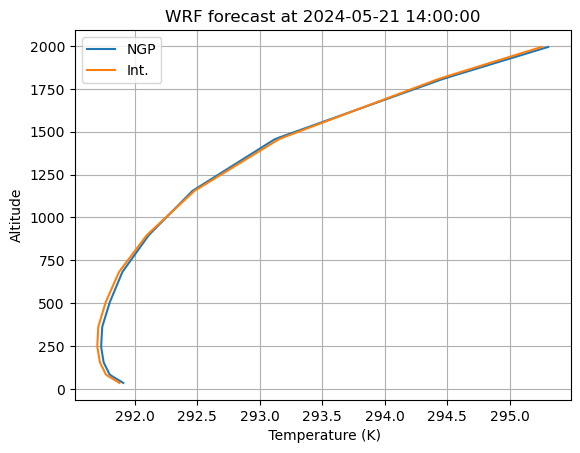

In [106]:
plt.plot(theta_alt_ngp, z_alt_ngp, label='NGP')
plt.plot(theta_alt_int, z_alt_int, label='Int.')
plt.grid()
plt.xlabel(' Temperature (K)')
plt.ylabel('Altitude')
plt.legend()
plt.title(f"WRF forecast at {wrf_path.split('_')[-2]} {wrf_path.split('_')[-1]}")

# Note on the madness of WRF vertical levels

### Let's look at what the raw WRF levels look like prior to interpolating to vertical levels using `interplevel`. We will do this by looking at `z` at our nearest gridpoint:

In [111]:
z_ngp = z[:,grid_ref_int[1], grid_ref_int[0]]
z_ngp

<xarray.DataArray 'height_agl' (bottom_top: 50)> Size: 200B
array([   25.088287,    82.17401 ,   154.78885 ,   246.64099 ,
         361.9933  ,   505.57587 ,   682.3728  ,   897.31116 ,
        1154.7708  ,  1458.0682  ,  1809.1495  ,  2207.9478  ,
        2651.8052  ,  3136.9497  ,  3656.5532  ,  4187.454   ,
        4711.45    ,  5228.2485  ,  5737.8276  ,  6240.616   ,
        6737.099   ,  7226.9395  ,  7709.9644  ,  8186.278   ,
        8655.112   ,  9116.08    ,  9570.731   , 10024.14    ,
       10481.354   , 10942.094   , 11404.996   , 11870.053   ,
       12335.896   , 12802.349   , 13270.265   , 13738.747   ,
       14205.504   , 14669.843   , 15132.561   , 15593.939   ,
       16053.661   , 16512.094   , 16969.947   , 17427.012   ,
       17883.625   , 18340.107   , 18796.15    , 19251.232   ,
       19705.045   , 20158.34    ], dtype=float32)
Coordinates:
    XLONG         float32 4B -3.081
    XLAT          float32 4B 54.62
    XTIME         float32 4B 1.56e+03
    Time          datetime64[ns] 8B 2024-05-21T14:00:00
    latlon_coord  object 8B CoordPair(lat=54.620538, lon=-3.080279)
Dimensions without coordinates: bottom_top
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  model height - [AGL] (mass grid)
    units:        m
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-2.0, moad_cen_lat=57.0, truelat...

Text(0, 0.5, 'Height above ground level (m)')

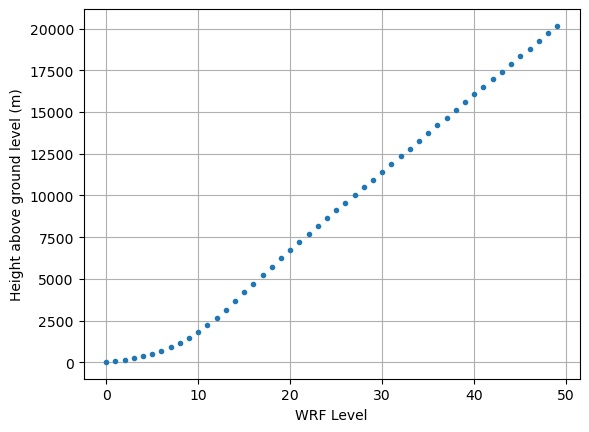

In [117]:
plt.plot(z_ngp, marker='.', linestyle='')
plt.grid()
plt.xlabel('WRF Level')
plt.ylabel('Height above ground level (m)')

### As out lowest level is around 25m, we must make sure our desired levels are above this or we will get some `NaN`s!!!